In [1]:
import os
import sys
import math
import argparse
import numpy as np
from collections import Counter

# Keras imports
from keras.models import Model
from keras import backend as K

# ML4CVD Imports
from ml4cvd.arguments import parse_args
from ml4cvd.models import make_multimodal_multitask_model, train_model_from_generators
from ml4cvd.tensor_generators import TensorGenerator, big_batch_from_minibatch_generator, test_train_valid_tensor_generators

# IPython imports
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/apache_beam/__init__.py:84: UserWarning: Running the Apache Beam SDK on Python 3 is not yet fully supported. You may encounter buggy behavior or missing features.
  'Running the Apache Beam SDK on Python 3 is not yet fully supported. '


In [2]:
def gradients_from_output(args, model, output_layer, output_index):
    K.set_learning_phase(1)
    input_tensor = model.input
    x = model.get_layer(output_layer).output[:,output_index]
    grads = K.gradients(x, input_tensor)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-6) # normalization trick: we normalize the gradient
    iterate = K.function([input_tensor], [x, grads])
    return iterate

def saliency_map(input_tensor, model, output_layer, output_index):
    get_gradients = gradients_from_output(args, model, output_layer, output_index)
    activation, grads = get_gradients([input_tensor])
    print('Activation is:', activation, 'gradient shape:', grads.shape)
    return grads


In [ ]:
sys.argv = ['train', 
            '--tensors', '/mnt/disks/sax-lax-40k-lvm/2019-11-21/', 
            '--input_tensors', 't2_flair_brain_30_slices', 
            '--output_tensors', 'age_2',
            '--batch_size', '1',
            '--epochs', '2',  
            '--learning_rate', '0.001',
            '--training_steps', '128',
            '--validation_steps', '10',
            '--test_steps', '1',
            '--model_file', '/mnt/ml4cvd/projects/jamesp/data/models/mri_slice_esv.hd5',
            '--id', 'mri_slice_esv']

args = parse_args()
generate_train, generate_valid, generate_test = test_train_valid_tensor_generators(**args.__dict__)
model = make_multimodal_multitask_model(**args.__dict__)
test_data, test_labels, test_paths = big_batch_from_minibatch_generator(generate_test, args.test_steps)

2019-12-05 08:44:57,342 - logger:25 - INFO - Logging configuration was loaded. Log messages can be found at ./recipes_output/mri_slice_esv/log_2019-12-05_08-44_0.log.
2019-12-05 08:44:57,343 - arguments:197 - INFO - Command Line was:

./scripts/tf.sh train --tensors /mnt/disks/sax-lax-40k-lvm/2019-11-21/ --input_tensors t2_flair_brain_30_slices --output_tensors age_2 --batch_size 1 --epochs 2 --learning_rate 0.001 --training_steps 128 --validation_steps 10 --test_steps 1 --model_file /mnt/ml4cvd/projects/jamesp/data/models/mri_slice_esv.hd5 --id mri_slice_esv



2019-12-05 08:44:57,344 - arguments:198 - INFO - Total TensorMaps:336 Arguments are Namespace(activation='relu', aligned_dimension=16, alpha=0.5, app_csv=None, b_slice_force=None, balance_csvs=[], batch_size=1, bigquery_credentials_file='/mnt/ml4cvd/projects/jamesp/bigquery/bigquery-viewer-credentials.json', bigquery_dataset='broad-ml4cvd.ukbb7089_r10data', block_size=3, cache_size=1000000000.0, categorical_field_ids=[], contin

2019-12-05 08:45:08,173 - tensor_generators:110 - INFO - Starting test_worker_0.
2019-12-05 08:45:08,182 - tensor_generators:234 - INFO - test_worker_0 initialized cache of size 0.997 GB.
2019-12-05 08:45:08,203 - tensor_generators:110 - INFO - Starting test_worker_1.
2019-12-05 08:45:08,212 - tensor_generators:234 - INFO - test_worker_1 initialized cache of size 0.997 GB.
2019-12-05 08:45:08,232 - tensor_generators:110 - INFO - Starting test_worker_2.
2019-12-05 08:45:08,242 - tensor_generators:234 - INFO - test_worker_2 initialized cache of size 0.997 GB.
2019-12-05 08:45:08,262 - tensor_generators:110 - INFO - Starting test_worker_3.
2019-12-05 08:45:08,273 - tensor_generators:234 - INFO - test_worker_3 initialized cache of size 0.997 GB.
2019-12-05 08:45:34,068 - tensor_generators:301 - INFO - Worker test_worker_1 - In true epoch 1:
	The following errors occurred:
		[KeyError: "Unable to open object (object 'ukb_brain_mri' doesn't exist)"] - 939
		[KeyError: "Unable to open object 

Process test_worker_1:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/ml4cvd/tensor_generators.py", line 319, in multiprocessing_worker
    self._on_epoch_end()
  File "/usr/local/lib/python3.6/dist-packages/ml4cvd/tensor_generators.py", line 303, in _on_epoch_end
    raise ValueError(f"Completed an epoch but did not find any tensors to yield")
ValueError: Completed an epoch but did not find any tensors to yield


2019-12-05 08:45:34,242 - tensor_generators:301 - INFO - Worker test_worker_0 - In true epoch 1:
	The following errors occurred:
		[KeyError: "Unable to open object (object 'ukb_brain_mri' doesn't exist)"] - 937
		[KeyError: "Unable to open object (object 'T2_FLAIR_brain' doesn't exist)"] - 891
		[skipped_paths] - 2
	Generator looped & shuffled over 1829 paths.
	0 tensors were presented.
	The cache holds 0 out of a possible 3658 tensors and is 0% full.
	So far there have been 0 cache hits.
	2 paths were skipped because they previously failed.
	26.07 seconds elapsed.


Process test_worker_0:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/ml4cvd/tensor_generators.py", line 319, in multiprocessing_worker
    self._on_epoch_end()
  File "/usr/local/lib/python3.6/dist-packages/ml4cvd/tensor_generators.py", line 303, in _on_epoch_end
    raise ValueError(f"Completed an epoch but did not find any tensors to yield")
ValueError: Completed an epoch but did not find any tensors to yield


2019-12-05 08:45:34,458 - tensor_generators:301 - INFO - Worker test_worker_3 - In true epoch 1:
	The following errors occurred:
		[KeyError: "Unable to open object (object 'T2_FLAIR_brain' doesn't exist)"] - 916
		[KeyError: "Unable to open object (object 'ukb_brain_mri' doesn't exist)"] - 911
		[skipped_paths] - 2
	Generator looped & shuffled over 1828 paths.
	0 tensors were presented.
	The cache holds 0 out of a possible 3656 tensors and is 0% full.
	So far there have been 0 cache hits.
	2 paths were skipped because they previously failed.
	26.19 seconds elapsed.


Process test_worker_3:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/ml4cvd/tensor_generators.py", line 319, in multiprocessing_worker
    self._on_epoch_end()
  File "/usr/local/lib/python3.6/dist-packages/ml4cvd/tensor_generators.py", line 303, in _on_epoch_end
    raise ValueError(f"Completed an epoch but did not find any tensors to yield")
ValueError: Completed an epoch but did not find any tensors to yield


2019-12-05 08:45:34,639 - tensor_generators:301 - INFO - Worker test_worker_2 - In true epoch 1:
	The following errors occurred:
		[KeyError: "Unable to open object (object 'T2_FLAIR_brain' doesn't exist)"] - 950
		[KeyError: "Unable to open object (object 'ukb_brain_mri' doesn't exist)"] - 877
		[skipped_paths] - 2
	Generator looped & shuffled over 1828 paths.
	0 tensors were presented.
	The cache holds 0 out of a possible 3656 tensors and is 0% full.
	So far there have been 0 cache hits.
	2 paths were skipped because they previously failed.
	26.40 seconds elapsed.


Process test_worker_2:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/ml4cvd/tensor_generators.py", line 319, in multiprocessing_worker
    self._on_epoch_end()
  File "/usr/local/lib/python3.6/dist-packages/ml4cvd/tensor_generators.py", line 303, in _on_epoch_end
    raise ValueError(f"Completed an epoch but did not find any tensors to yield")
ValueError: Completed an epoch but did not find any tensors to yield


In [4]:
test_tensor = test_data['input_mri_slice']
print(test_tensor.shape, test_tensor[:1].shape)
_, axes = plt.subplots(1, 6, figsize=(18, 14))
[axes[i].imshow(test_tensor[i, :, :, 0]) for i in range(6)]

NameError: name 'test_data' is not defined

In [ ]:
grads = saliency_map(test_tensor, model, 'output_end_systole_volume_continuous', 0)
_, axes = plt.subplots(1, 6, figsize=(18, 14))
[axes[i].imshow(grads[i, :, :, 0]) for i in range(6)]

In [5]:
sys.argv = ['train', 
            '--tensors', '/mnt/disks/pix-size-tensors/2019-04-29/', 
            '--input_tensors', 'mri_slice', 
            '--output_tensors', 'bmi',
            '--batch_size', '6',
            '--epochs', '2',  
            '--learning_rate', '0.001',
            '--training_steps', '128',
            '--validation_steps', '10',
            '--test_steps', '1',
            '--model_file', '/mnt/ml4cvd/projects/jamesp/data/models/mri_slice_bmi.hd5',
            '--id', 'mri_slice_bmi']

args = parse_args()

generate_train, generate_valid, generate_test = test_train_valid_tensor_generators(**args.__dict__)
model = make_multimodal_multitask_model(**args.__dict__)
test_data, test_labels, test_paths = big_batch_from_minibatch_generator(generate_test, args.test_steps)

2019-12-18 20:00:35,282 - logger:25 - INFO - Logging configuration was loaded. Log messages can be found at ./recipes_output/mri_slice_bmi/log_2019-12-18_20-00_0.log.
2019-12-18 20:00:35,283 - arguments:196 - INFO - Command Line was:

./scripts/tf.sh train --tensors /mnt/disks/pix-size-tensors/2019-04-29/ --input_tensors mri_slice --output_tensors bmi --batch_size 6 --epochs 2 --learning_rate 0.001 --training_steps 128 --validation_steps 10 --test_steps 1 --model_file /mnt/ml4cvd/projects/jamesp/data/models/mri_slice_bmi.hd5 --id mri_slice_bmi



2019-12-18 20:00:35,284 - arguments:197 - INFO - Total TensorMaps:6409 Arguments are Namespace(activation='relu', aligned_dimension=16, alpha=0.5, app_csv=None, b_slice_force=None, balance_csvs=[], batch_size=6, bigquery_credentials_file='/mnt/ml4cvd/projects/jamesp/bigquery/bigquery-viewer-credentials.json', bigquery_dataset='broad-ml4cvd.ukbb7089_r10data', block_size=3, cache_size=1000000000.0, categorical_field_ids=[], continuous_field_ids=

ValueError: Not enough tensors at /mnt/disks/pix-size-tensors/2019-04-29/


In [ ]:
test_tensor = test_data['input_mri_slice']
print(test_tensor.shape, test_tensor[:1].shape)
_, axes = plt.subplots(1, 6, figsize=(18, 14))
[axes[i].imshow(test_tensor[i, :, :, 0]) for i in range(6)]

In [ ]:
grads = saliency_map(test_tensor, model, 'output_23104_Body-mass-index-BMI_0_0_continuous', 0)
_, axes = plt.subplots(1, 6, figsize=(18, 14))
[axes[i].imshow(grads[i, :, :, 0]) for i in range(6)]

In [ ]:
sys.argv = ['train', 
            '--tensors', '/mnt/disks/pix-size-tensors/2019-04-29/', 
            '--input_tensors', 'mri_slice', 
            '--output_tensors', 'genetic_sex',
            '--batch_size', '6',
            '--epochs', '2',  
            '--learning_rate', '0.001',
            '--training_steps', '128',
            '--validation_steps', '10',
            '--test_steps', '1',
            '--model_file', '/mnt/ml4cvd/projects/jamesp/data/models/mri_slice_sex.hd5',
            '--id', 'mri_slice_sex']

args = parse_args()

generate_train, generate_valid, generate_test = test_train_valid_tensor_generators(args.tensor_maps_in,  args.tensor_maps_out,  args.tensors, args.batch_size,   args.valid_ratio, args.test_ratio, args.test_modulo, args.balance_csvs)

model = make_multimodal_multitask_model(**args.__dict__)

test_data, test_labels, test_paths = big_batch_from_minibatch_generator(args.tensor_maps_in, args.tensor_maps_out,
                                                                        generate_test, args.test_steps)

In [ ]:
test_tensor = test_data['input_mri_slice']
print(test_tensor.shape, test_tensor[:1].shape)
_, axes = plt.subplots(1, 6, figsize=(18, 14))
[axes[i].imshow(test_tensor[i, :, :, 0]) for i in range(6)]

In [ ]:
grads = saliency_map(test_tensor, model, 'output_genetic_sex_categorical', 0)
_, axes = plt.subplots(1, 6, figsize=(18, 14))
[axes[i].imshow(grads[i, :, :, 0]) for i in range(6)]

In [ ]:
sys.argv = ['train', 
            '--tensors', '/mnt/disks/pix-size-tensors/2019-04-29/', 
            '--input_tensors', 'mri_slice', 
            '--output_tensors', 'birth_year',
            '--batch_size', '6',
            '--epochs', '2',  
            '--learning_rate', '0.001',
            '--training_steps', '128',
            '--validation_steps', '10',
            '--test_steps', '1',
            '--model_file', '/mnt/ml4cvd/projects/jamesp/data/models/mri_slice_age.hd5',
            '--id', 'mri_slice_age']

args = parse_args()

generate_train, generate_valid, generate_test = test_train_valid_tensor_generators(args.tensor_maps_in,  args.tensor_maps_out,  args.tensors, args.batch_size,   args.valid_ratio, args.test_ratio, args.test_modulo, args.balance_csvs)

model = make_multimodal_multitask_model(**args.__dict__)

test_data, test_labels, test_paths = big_batch_from_minibatch_generator(args.tensor_maps_in, args.tensor_maps_out,
                                                                        generate_test, args.test_steps)

In [ ]:
test_tensor = test_data['input_mri_slice']
print(test_tensor.shape, test_tensor[:1].shape)
_, axes = plt.subplots(1, 6, figsize=(18, 14))
[axes[i].imshow(test_tensor[i, :, :, 0]) for i in range(6)]

In [ ]:
grads = saliency_map(test_tensor, model, 'output_22200_Year-of-birth_0_0_continuous', 0)
_, axes = plt.subplots(1, 6, figsize=(18, 14))
[axes[i].imshow(grads[i, :, :, 0]) for i in range(6)]

In [ ]:
sys.argv = ['train', 
            '--tensors', '/mnt/disks/pix-size-tensors/2019-04-29/', 
            '--input_tensors', 'mri_systole_diastole', 
            '--output_tensors', 'end_systole_volume',
            '--batch_size', '6',
            '--epochs', '2',  
            '--learning_rate', '0.001',
            '--training_steps', '128',
            '--validation_steps', '10',
            '--test_steps', '1',
            '--model_file', '/mnt/ml4cvd/projects/jamesp/data/models/mri_systole_diastole_esv.hd5',
            '--id', 'mri_systole_diastole_esv']
args = parse_args()

generate_train, generate_valid, generate_test = test_train_valid_tensor_generators(args.tensor_maps_in,  args.tensor_maps_out,  args.tensors, args.batch_size,   args.valid_ratio, args.test_ratio, args.test_modulo, args.balance_csvs)

model = make_multimodal_multitask_model(**args.__dict__)

test_data, test_labels, test_paths = big_batch_from_minibatch_generator(args.tensor_maps_in, args.tensor_maps_out,
                                                                        generate_test, args.test_steps)


In [ ]:
test_tensor = test_data['input_mri_systole_diastole']
print(test_tensor.shape, test_tensor[:1].shape)
_, axes = plt.subplots(2, 6, figsize=(18, 4), sharex=True)
for i in range(6):
    axes[0, i].set_title('Diastole')
    axes[1, i].set_title('Systole')
    axes[0, i].imshow(test_tensor[i, :, :, 0, 0])
    axes[1, i].imshow(test_tensor[i, :, :, 1, 0])
    

In [ ]:
grads = saliency_map(test_tensor, model, 'output_end_systole_volume_continuous', 0)
_, axes = plt.subplots(2, 6, figsize=(18, 4), sharex=True)
for i in range(6):
    axes[0, i].set_title('Diastole')
    axes[1, i].set_title('Systole')
    axes[0, i].imshow(grads[i, :, :, 0, 0])
    axes[1, i].imshow(grads[i, :, :, 1, 0])
    

In [2]:
sys.argv = ['train', 
            '--tensors', '/mnt/disks/sax-lax-40k-teacher/2019-11-21/', 
            '--input_tensors', 'ecg_rest_raw', 
            '--output_tensors', 'myocardial_mass_noheritable_men_only',
            '--batch_size', '6',
            '--epochs', '2',  
            '--learning_rate', '0.001',
            '--training_steps', '128',
            '--validation_steps', '10',
            '--test_steps', '1',
            '--model_file', '/home/sam/ml/trained_models/ecg_rest_raw_unet_myocardial_mass_noheritable/ecg_rest_raw_unet_myocardial_mass_noheritable.hd5',
            '--id', 'err_myocardial_mass_noheritable_men_only']
args = parse_args()

generate_train, generate_valid, generate_test = test_train_valid_tensor_generators(**args.__dict__)
model = make_multimodal_multitask_model(**args.__dict__)
test_data, test_labels, test_paths = big_batch_from_minibatch_generator(generate_test, args.test_steps)

2019-12-18 20:22:01,985 - logger:25 - INFO - Logging configuration was loaded. Log messages can be found at ./recipes_output/err_myocardial_mass_noheritable_men_only/log_2019-12-18_20-22_0.log.
2019-12-18 20:22:01,986 - arguments:196 - INFO - Command Line was:

./scripts/tf.sh train --tensors /mnt/disks/sax-lax-40k-teacher/2019-11-21/ --input_tensors ecg_rest_raw --output_tensors myocardial_mass_noheritable_men_only --batch_size 6 --epochs 2 --learning_rate 0.001 --training_steps 128 --validation_steps 10 --test_steps 1 --model_file /home/sam/ml/trained_models/ecg_rest_raw_unet_myocardial_mass_noheritable/ecg_rest_raw_unet_myocardial_mass_noheritable.hd5 --id err_myocardial_mass_noheritable_men_only



2019-12-18 20:22:01,989 - arguments:197 - INFO - Total TensorMaps:350 Arguments are Namespace(activation='relu', aligned_dimension=16, alpha=0.5, app_csv=None, b_slice_force=None, balance_csvs=[], batch_size=6, bigquery_credentials_file='/mnt/ml4cvd/projects/jamesp/bigquery/bigquery-view

2019-12-18 20:22:21,511 - tensor_generators:110 - INFO - Starting test_worker_0.
2019-12-18 20:22:21,514 - tensor_generators:234 - INFO - test_worker_0 initialized cache of size 0.439 GB.
2019-12-18 20:22:21,542 - tensor_generators:110 - INFO - Starting test_worker_1.
2019-12-18 20:22:21,548 - tensor_generators:234 - INFO - test_worker_1 initialized cache of size 0.439 GB.
2019-12-18 20:22:21,569 - tensor_generators:110 - INFO - Starting test_worker_2.
2019-12-18 20:22:21,574 - tensor_generators:234 - INFO - test_worker_2 initialized cache of size 0.439 GB.
2019-12-18 20:22:21,595 - tensor_generators:110 - INFO - Starting test_worker_3.
2019-12-18 20:22:21,600 - tensor_generators:234 - INFO - test_worker_3 initialized cache of size 0.439 GB.
2019-12-18 20:22:28,376 - tensor_generators:372 - INFO - Tensor 'input_ecg_rest_raw_ecg_rest' has shape (6, 5000, 12).
2019-12-18 20:22:28,379 - tensor_generators:372 - INFO - Tensor 'output_inferred_myocardial_mass_noheritable_continuous' has shap

(6, 5000, 12) (1, 5000, 12)


[[<matplotlib.lines.Line2D at 0x7ff1bda28a20>],

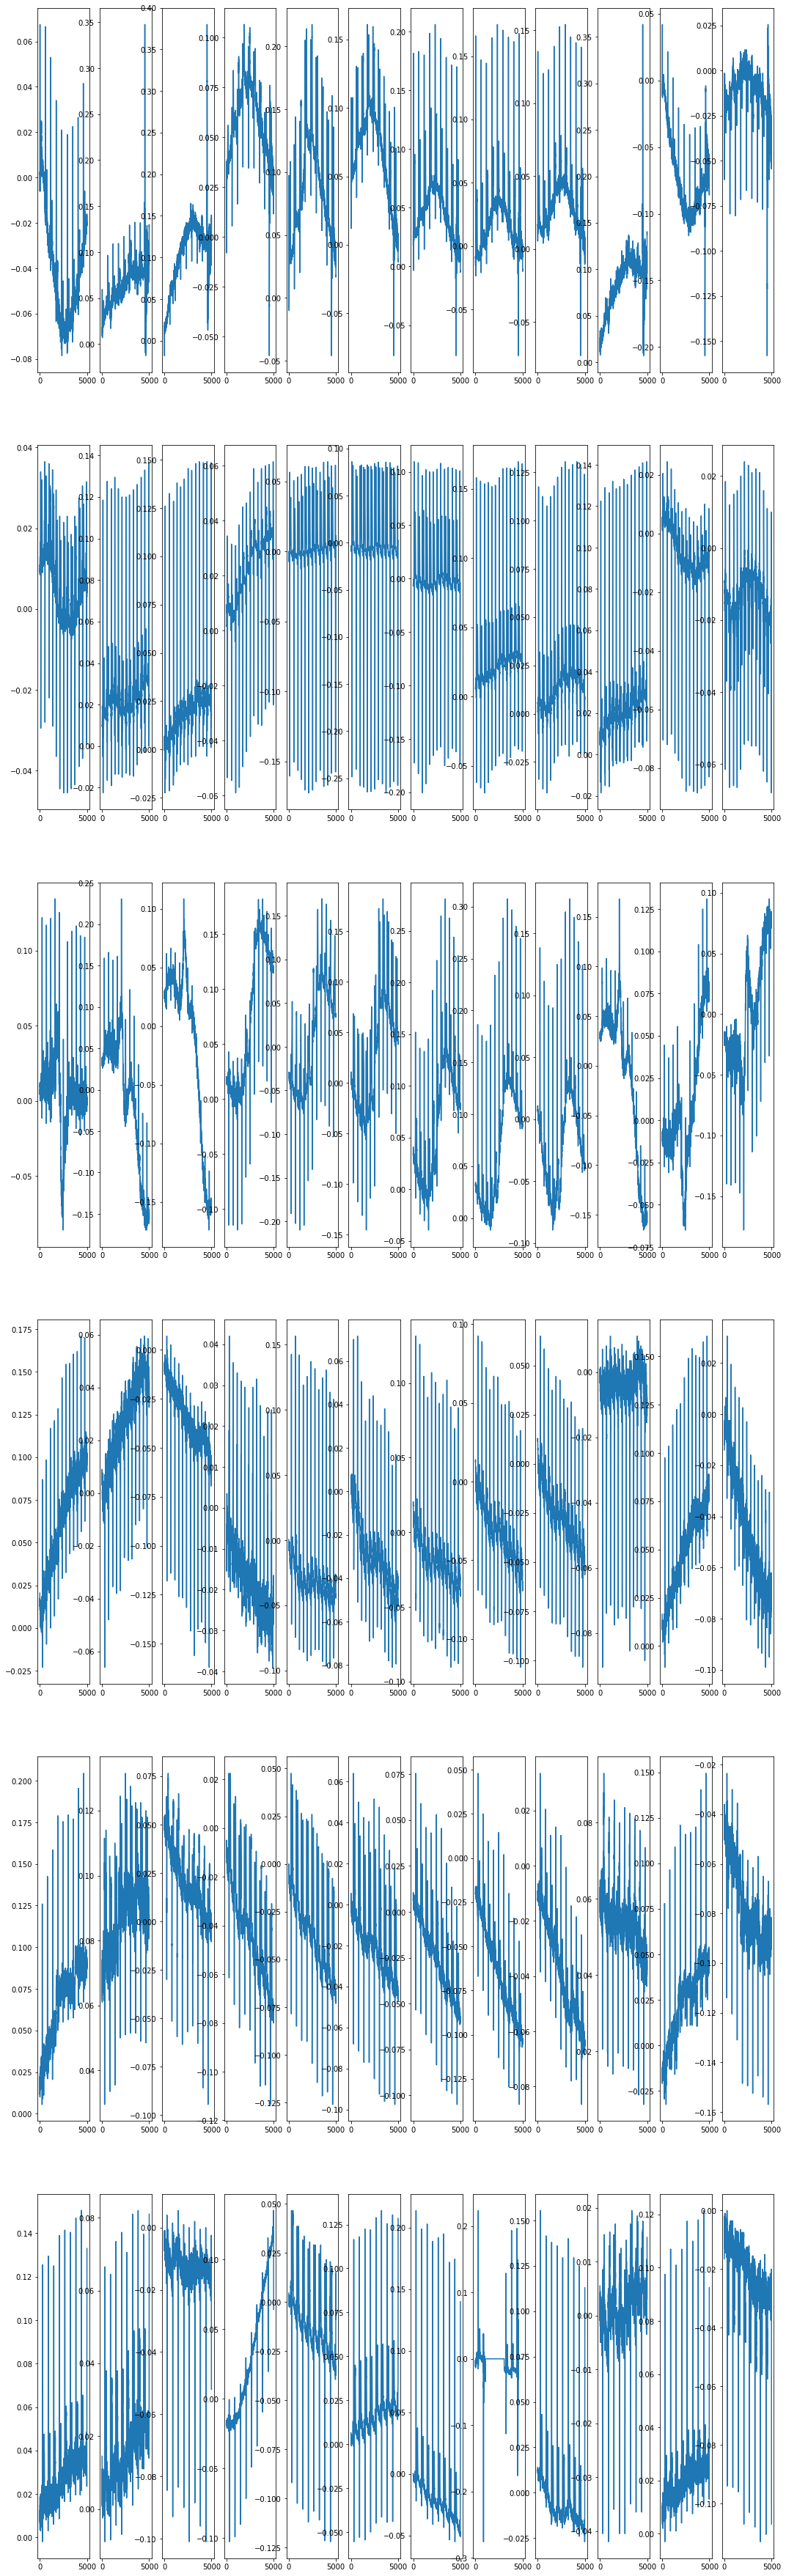

In [4]:
test_tensor = test_data['input_ecg_rest_raw_ecg_rest']
print(test_tensor.shape, test_tensor[3:4].shape)
_, axes = plt.subplots(6, 12, figsize=(18, 64))
[axes[i, j].plot(test_tensor[i,:,j].flatten('F')) for i in range(6) for j in range(12)]

In [37]:
def plot_ecg_array(ecg, rows=3, cols=4, time_interval=2.5, raw_scale=0.005, hertz=500):
    _, axes = plt.subplots(rows, cols, figsize=(18, 16))
    yy = ecg * raw_scale
    print(yy.shape, cols, rows, ecg.shape)
    for i in range(rows):
        for j in range(cols):
            start = int(i*time_interval*hertz)
            stop = int((i+1)*time_interval*hertz)
            axes[i, j].plot(range(start, stop), yy[start:stop, j + i*cols])
            axes[i, j].set_xlim(start, stop)
    

(5000, 12) 4 3 (5000, 12)


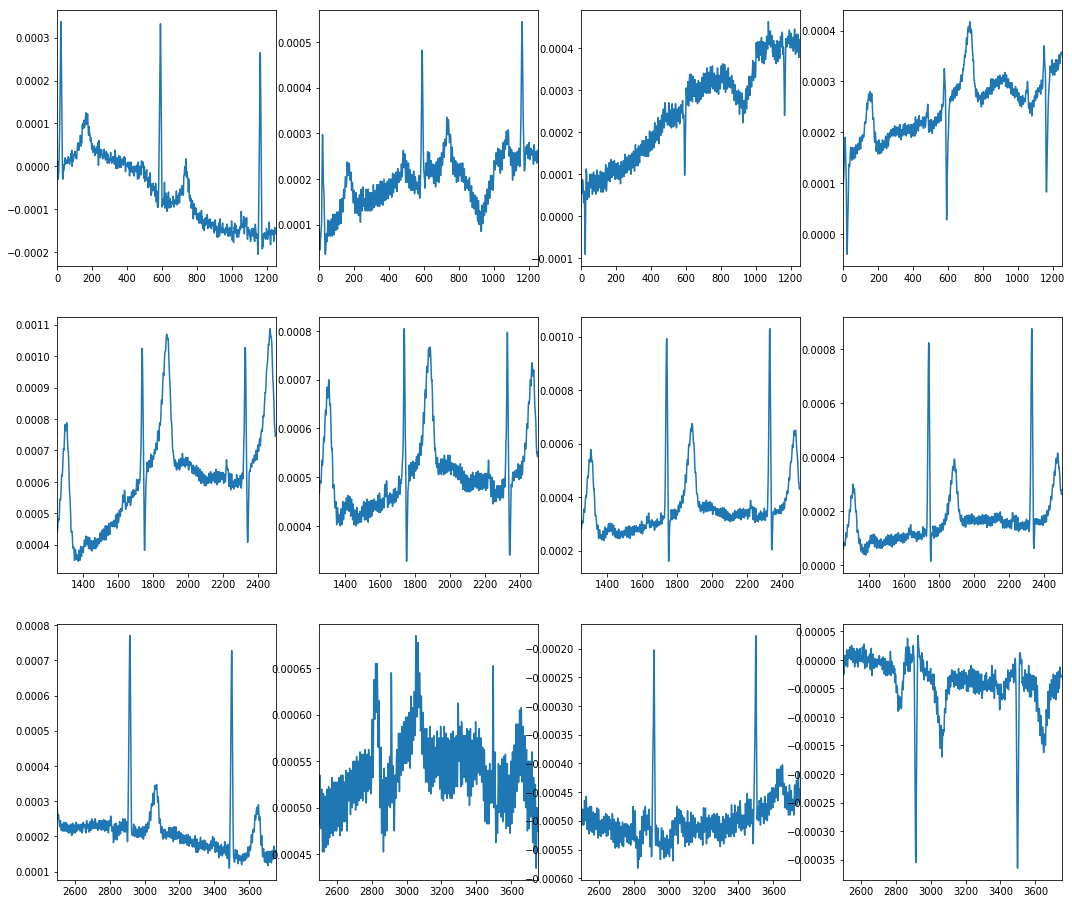

In [38]:
plot_ecg_array(test_tensor[0]) 

In [ ]:
sys.argv = ['train', 
            '--tensors', '/mnt/disks/ecg-rest-37k-tensors/2019-11-04/', 
            '--input_tensors', 'ecg_rest_1lead', 
            '--output_tensors', 'ecg_semi_coarse_with_poor',
            '--batch_size', '6',
            '--epochs', '2',  
            '--learning_rate', '0.001',
            '--training_steps', '128',
            '--validation_steps', '10',
            '--test_steps', '1',
            '--model_file', '/mnt/ml4cvd/projects/models/ecg_1lead_rhythm_only/ecg_1lead_rhythm_only.hd5',
            '--id', 'ecg_1lead_rhythm_only']
args = parse_args()

generate_train, generate_valid, generate_test = test_train_valid_tensor_generators(**args.__dict__)
model = make_multimodal_multitask_model(**args.__dict__)
test_data, test_labels, test_paths = big_batch_from_minibatch_generator(generate_test, args.test_steps)

(6, 600, 8) (1, 600, 8)


[[<matplotlib.lines.Line2D at 0x7fdcb9e6c358>],

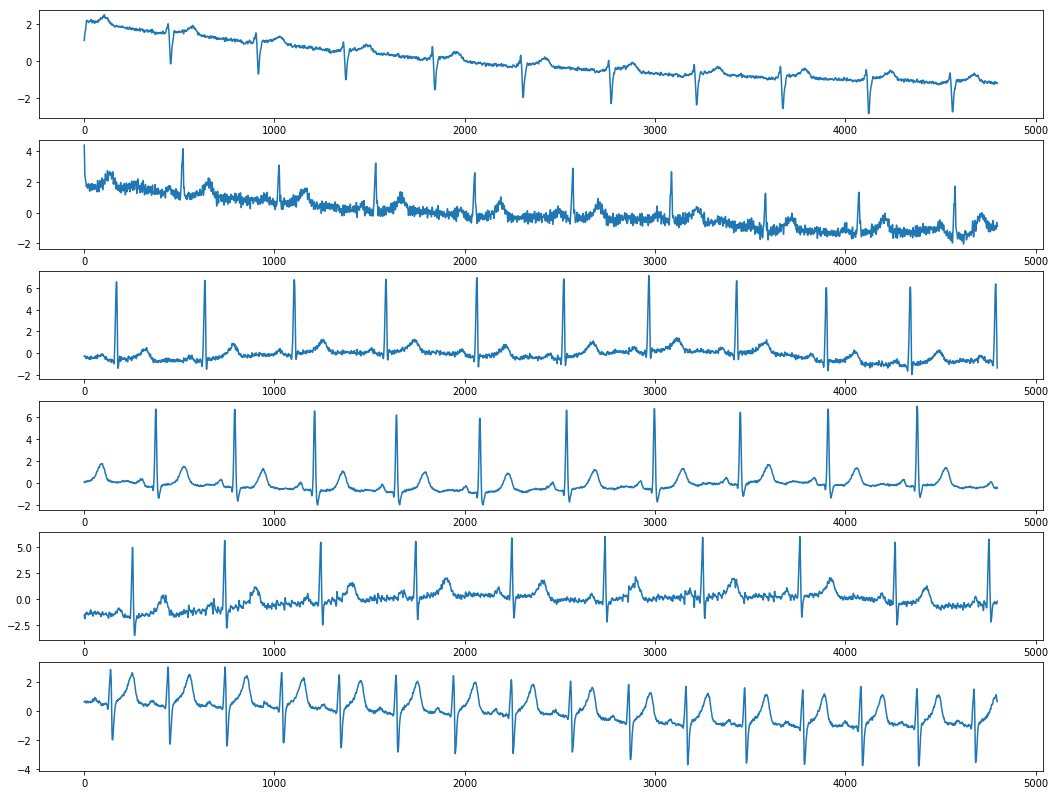

In [9]:
test_tensor = test_data['input_strip_ecg_rest']
print(test_tensor.shape, test_tensor[3:4].shape)
_, axes = plt.subplots(6, 1, figsize=(18, 14))
[axes[i].plot(test_tensor[i,:,:].flatten('F')) for i in range(6)]

Activation is: [0.78537273 0.02365382 0.85129386 0.61835    0.11739869 0.639767  ] gradient shape: (6, 600, 8)


[[<matplotlib.lines.Line2D at 0x7fdcb8296dd8>],

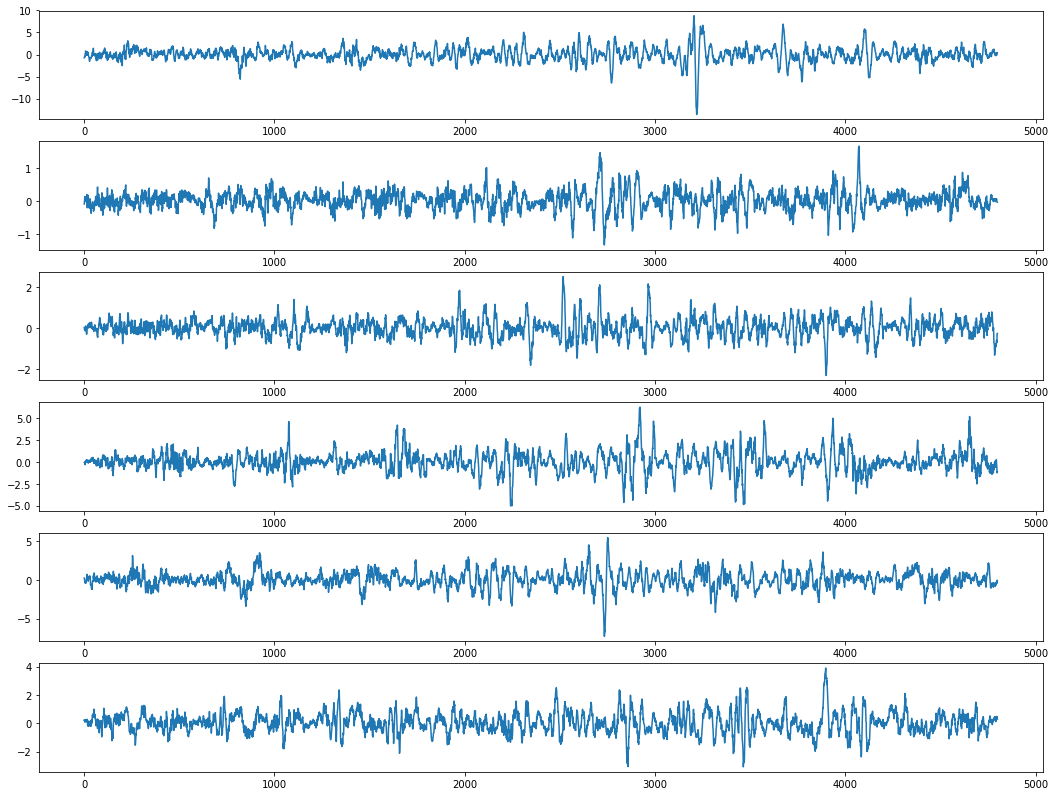

In [10]:
grads = saliency_map(test_tensor, model, 'output_ecg_semi_coarse_with_poor_categorical', 0)
_, axes = plt.subplots(6, 1, figsize=(18, 14))
[axes[i].plot(grads[i,:,:].flatten('F')) for i in range(6)]

Activation is: [0.15924527 0.03701343 0.09066808 0.14385022 0.139154   0.23821706] gradient shape: (6, 600, 8)


[[<matplotlib.lines.Line2D at 0x7fdc8f440dd8>],

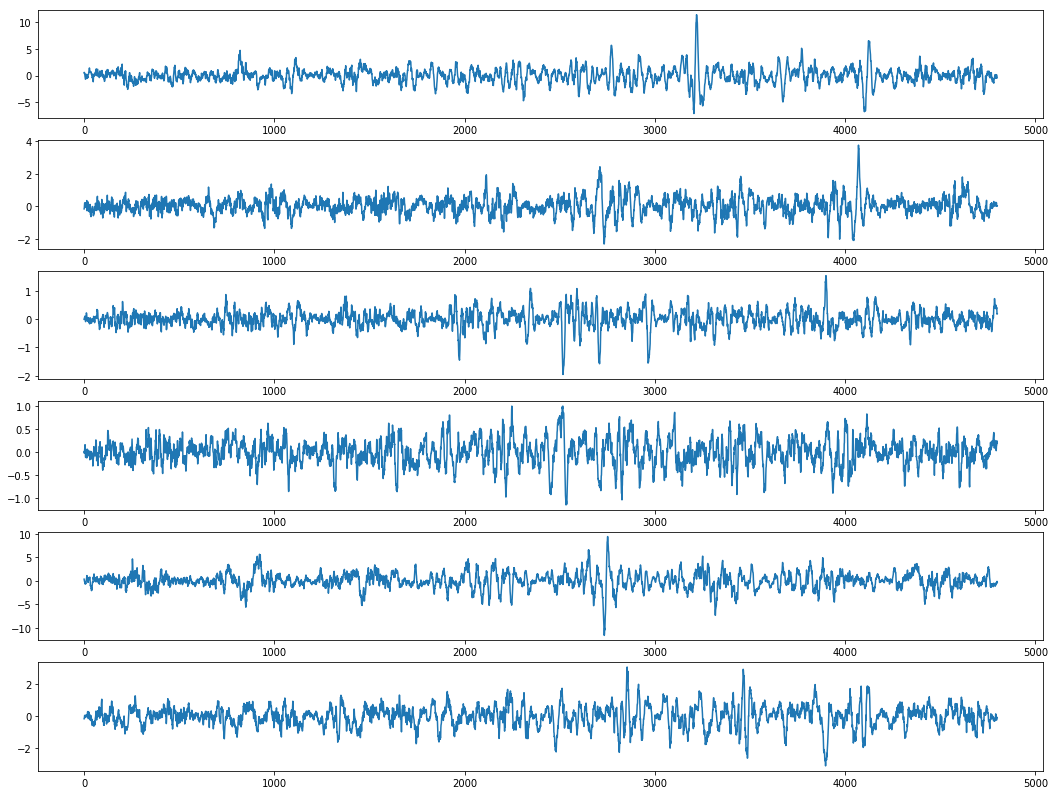

In [11]:
grads = saliency_map(test_tensor, model, 'output_ecg_semi_coarse_with_poor_categorical', 3)
_, axes = plt.subplots(6, 1, figsize=(18, 14))
[axes[i].plot(grads[i,:,:].flatten('F')) for i in range(6)]

In [12]:
xdir = '/mnt/disks/ecg-rest-37k-tensors/2019-11-04/'
paths = [xdir+'1238558.hd5', xdir+'1258475.hd5', xdir+'1286494.hd5', xdir+'1381627.hd5', 
         xdir+'1487911.hd5', xdir+'1509361.hd5', xdir+'1578315.hd5', xdir+'1616127.hd5', xdir+'1723645.hd5', ]
generator = TensorGenerator(8, args.tensor_maps_in, args.tensor_maps_out, paths, None, True)
data, labels, hd5s = next(generator)
print('predicitons are:', model.predict(data))

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [13]:
test_tensor = data['input_strip_ecg_rest']
_, axes = plt.subplots(8, 1, figsize=(18, 14))
[axes[i].plot(test_tensor[i,:,:].flatten('F')) for i in range(8)]

NameError: name 'data' is not defined

In [ ]:
grads = saliency_map(test_tensor, model, 'output_ecg_semi_coarse_with_poor_categorical', 3)
_, axes = plt.subplots(8, 1, figsize=(18, 14))
[axes[i].plot(grads[i,:,:].flatten('F')) for i in range(8)]

In [ ]:
grads = saliency_map(test_tensor, model, 'output_ecg_semi_coarse_with_poor_categorical', 0)
_, axes = plt.subplots(8, 1, figsize=(18, 14))
[axes[i].plot(grads[i,:,:].flatten('F')) for i in range(8)]

In [ ]:
grads = saliency_map(test_tensor[7:8], model, 'output_ecg_semi_coarse_with_poor_categorical', 2)

In [ ]:
grads = saliency_map(test_tensor[7:8], model, 'output_ecg_semi_coarse_with_poor_categorical', 0)